# Contours

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from config import DATA_DIR

In [31]:
IMG_FP = DATA_DIR.joinpath("317948.jpg")
print(f"Image file path: {IMG_FP}")

Image file path: C:\Users\punit\projects\research\clotscape\data\317948.jpg


In [32]:
# Read the CT scan image in grayscale
image = cv2.imread(str(IMG_FP), 0)

# Create a binary thresholded image
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [33]:
# Find contours from the thresholded image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

Number of contours found: 25


In [34]:
# Create a copy of the original image for drawing contours
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

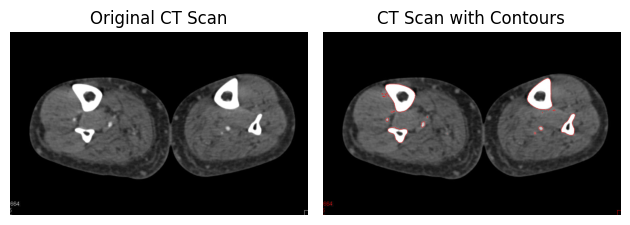

In [37]:
# Draw contours on the image in red color
cv2.drawContours(image_with_contours, contours, -1, (0, 0, 255), 1)

# Display the original image and the image with contours
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original CT Scan')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('CT Scan with Contours')
plt.axis('off')

plt.tight_layout()
plt.show()

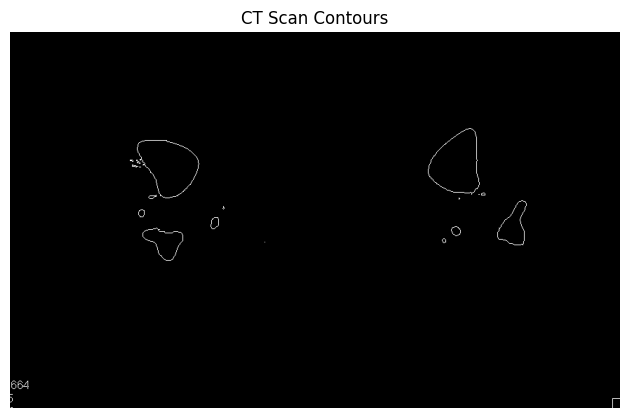

In [36]:
# Create a blank mask for drawing contours
mask = np.zeros(image.shape, dtype=np.uint8)

# Draw contours on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), 1)

# Display the contour plot
plt.imshow(mask, cmap='gray')
plt.title('CT Scan Contours')
plt.axis('off')
plt.tight_layout()
plt.show()